# Análise de Acidentes em João Pessoa
Este notebook realiza uma análise descritiva de acidentes de trânsito em João Pessoa, utilizando Python, pandas, matplotlib e seaborn.

## 1) Carregar os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados
df = pd.read_csv("acidentes_reduzido_completo.csv", sep=",", low_memory=False)

# Normalizar nomes das colunas
df.columns = [c.strip().lower() for c in df.columns]
df.head()

,num_acidente,data_acidente,uf_acidente,ano_acidente,codigo_ibge,dia_semana,fase_dia,tp_acidente,cond_meteorologica,end_acidente,...,lim_velocidade,tp_pista,qtde_acidente,qtde_acid_com_obitos,qtde_envolvidos,qtde_feridosilesos,qtde_obitos,faixa_idade,genero,tipo_veiculo
0,2590166,2018-01-19,AC,2018,1200401,SEXTA-FEIRA,MANHA,COLISAO,CLARO,RUA 20 DE MARCO,...,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,ENTRE 55 E 59 ANOS,MASCULINO,AUTOMOVEL
1,2590166,2018-01-19,AC,2018,1200401,SEXTA-FEIRA,MANHA,COLISAO,CLARO,RUA 20 DE MARCO,...,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,ENTRE 35 E 39 ANOS,MASCULINO,AUTOMOVEL
2,1645209,2018-01-18,AC,2018,1200401,QUINTA-FEIRA,TARDE,COLISAO,CLARO,RUA BENJAMIN CONSTANT,...,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,ENTRE 45 E 49 ANOS,FEMININO,CAMINHONETE
3,1645209,2018-01-18,AC,2018,1200401,QUINTA-FEIRA,TARDE,COLISAO,CLARO,RUA BENJAMIN CONSTANT,...,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,ENTRE 45 E 49 ANOS,FEMININO,AUTOMOVEL
4,1645209,2018-01-18,AC,2018,1200401,QUINTA-FEIRA,TARDE,COLISAO,CLARO,RUA BENJAMIN CONSTANT,...,NAO INFORMADO,NAO INFORMADO,1,0,2,2,0,ENTRE 75 E 79 ANOS,MASCULINO,CAMINHONETE


## 2) Filtrar dados para João Pessoa e ajustando dados

In [2]:
# Selecionar apenas João Pessoa
df_jp = df[df["codigo_ibge"] == 2507507].copy()
print("Total de acidentes em João Pessoa:", len(df_jp))

# Converter datas
df_jp["data_acidente"] = pd.to_datetime(df_jp["data_acidente"], errors="coerce")
df_jp["ano_mes"] = df_jp["data_acidente"].dt.to_period("M")

# Normalizar hora dos acidentes
# string de 6 dígitos
df_jp["hora_acidente_str"] = df_jp["hora_acidente"].astype(str).str.zfill(6)
# Extrair hora
df_jp["hora_num"] = df_jp["hora_acidente_str"].str.slice(0,2).astype(float)
# Filtrar apenas horas válidas (0-23)
df_horas_validas = df_jp[(df_jp["hora_num"] >= 0) & (df_jp["hora_num"] <= 23)]

Total de acidentes em João Pessoa: 14662


## 3) Função auxiliar para limpar categorias desconhecidas

In [3]:
def limpar_categoria(df, coluna):
    "Remove linhas com categorias 'NÃO INFORMADO' ou 'DESCONHECIDO'"
    return df[~df[coluna].str.upper().isin(["NAO INFORMADO", "NÃO INFORMADO", "DESCONHECIDO"])]

## 4) Análises descritivas

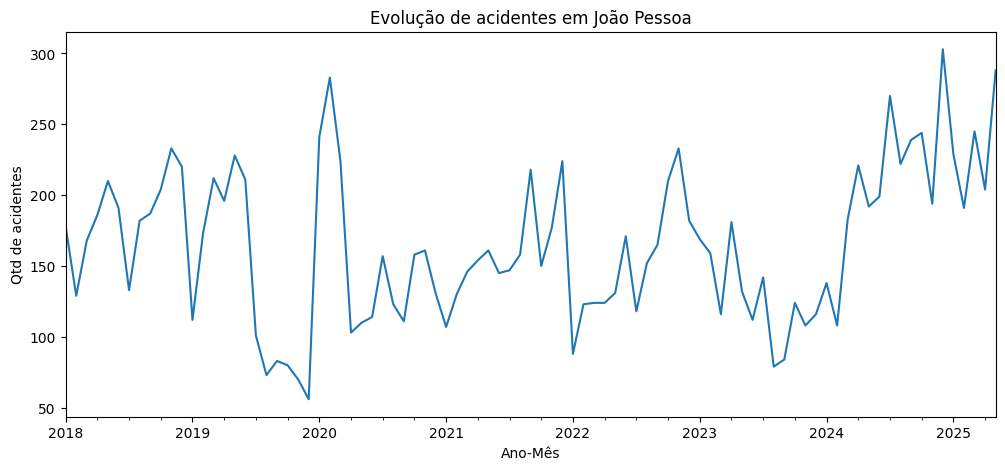

In [4]:
# Evolução mensal de acidentes
plt.figure(figsize=(12,5))
df_jp.groupby("ano_mes").size().plot()
plt.title("Evolução de acidentes em João Pessoa")
plt.ylabel("Qtd de acidentes")
plt.xlabel("Ano-Mês")
plt.show()

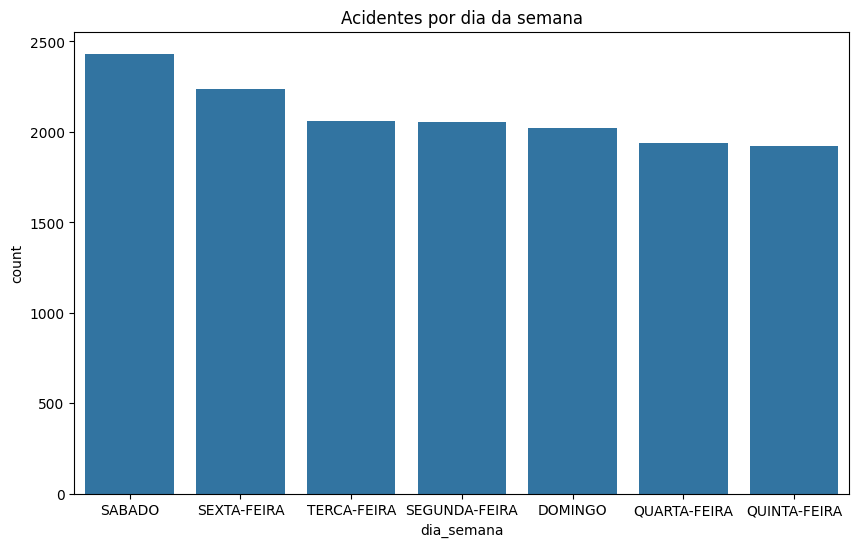

In [11]:
# Acidentes por dia da semana (sem NAO INFORMADO)
df_semana = limpar_categoria(df_jp, "dia_semana")
plt.figure(figsize=(10,6))
sns.countplot(data=df_semana, x="dia_semana", order=df_semana["dia_semana"].value_counts().index)
plt.title("Acidentes por dia da semana")
plt.show()

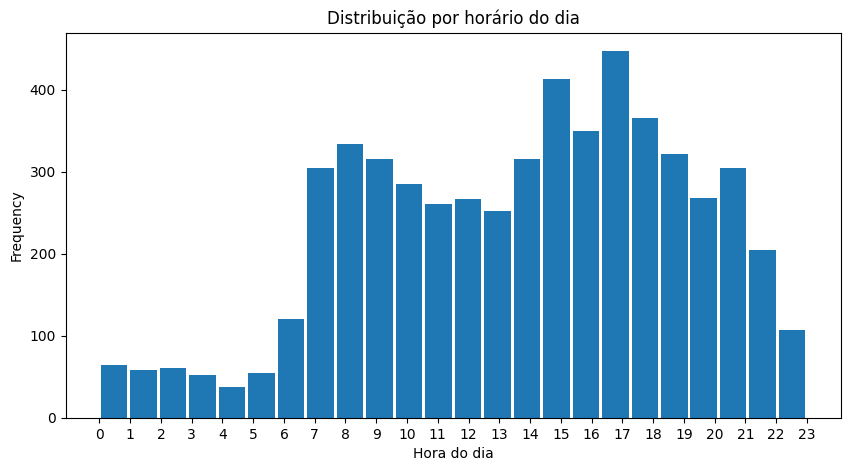

Horário mais crítico: 17 h


In [12]:
# Histograma de acidentes por hora
plt.figure(figsize=(10,5))
df_horas_validas["hora_num"].dropna().plot.hist(bins=24, rwidth=0.9)
plt.title("Distribuição por horário do dia")
plt.xlabel("Hora do dia")
plt.xticks(range(0,24))
plt.show()

# Horário mais crítico
hora_critica = df_horas_validas["hora_num"].mode()[0]
print("Horário mais crítico:", int(hora_critica), "h")

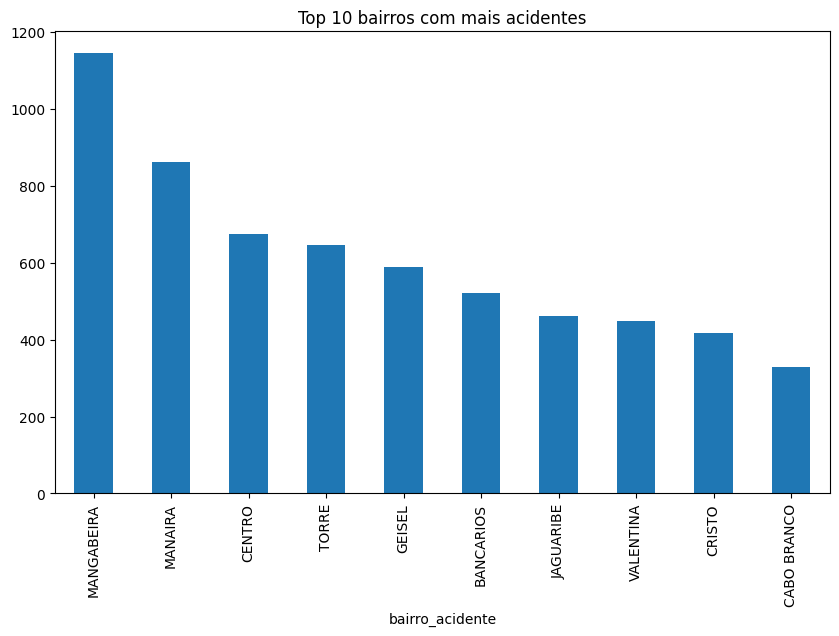

In [13]:
# Bairros críticos (sem NAO INFORMADO)
df_bairro = limpar_categoria(df_jp, "bairro_acidente")
plt.figure(figsize=(10,6))
df_bairro["bairro_acidente"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 bairros com mais acidentes")
plt.show()

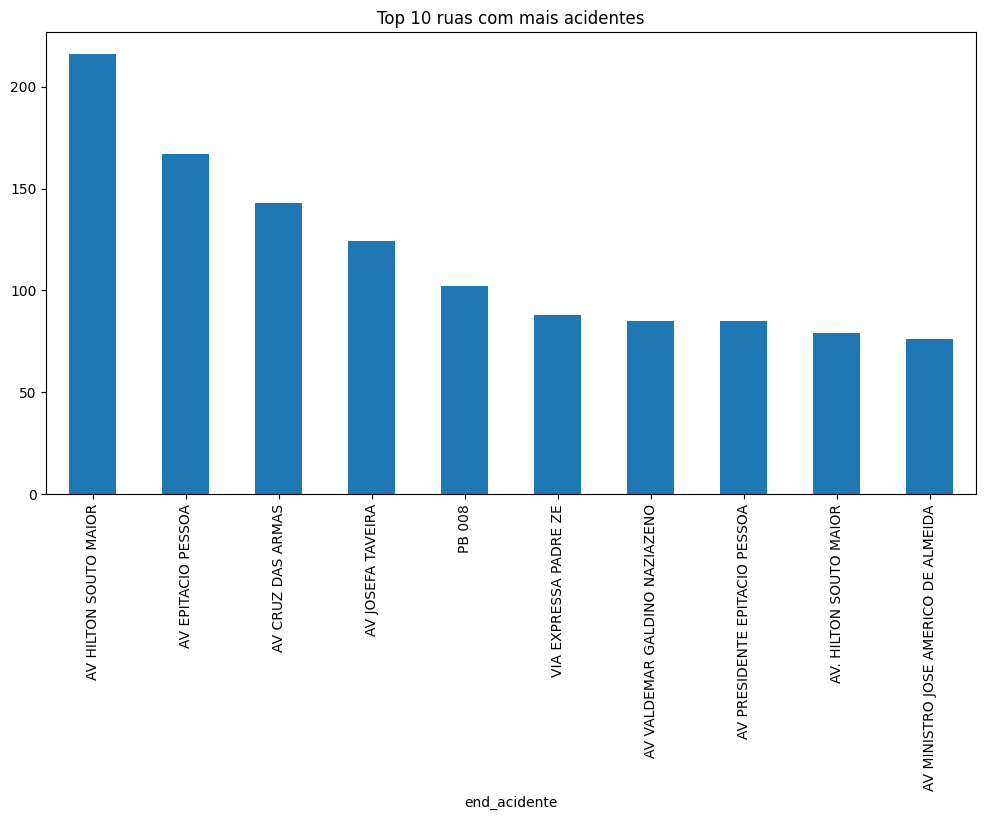

In [14]:
# Ruas críticas (sem NAO INFORMADO)
df_rua = limpar_categoria(df_jp, "end_acidente")
plt.figure(figsize=(12,6))
df_rua["end_acidente"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 ruas com mais acidentes")
plt.show()

## 5) Gravidade dos acidentes

Taxa de letalidade: 4.77%


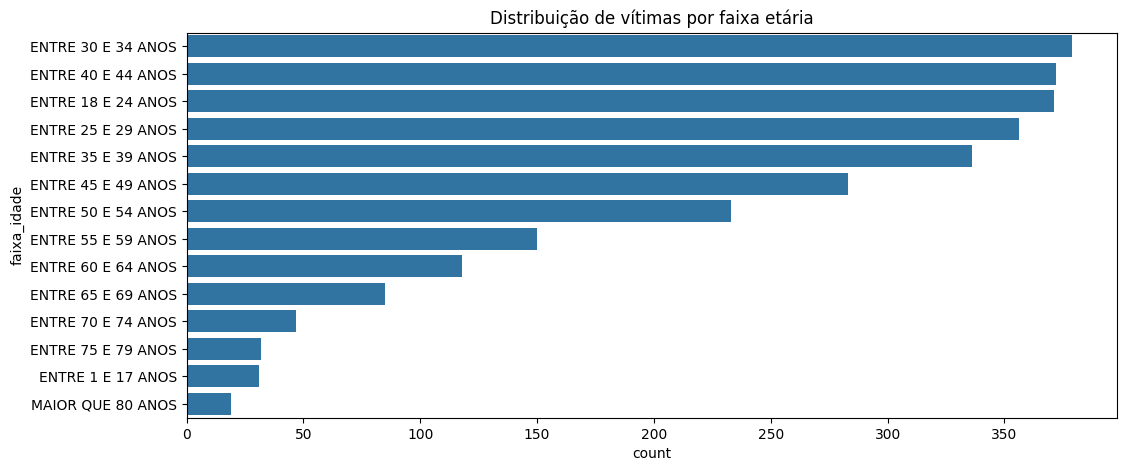

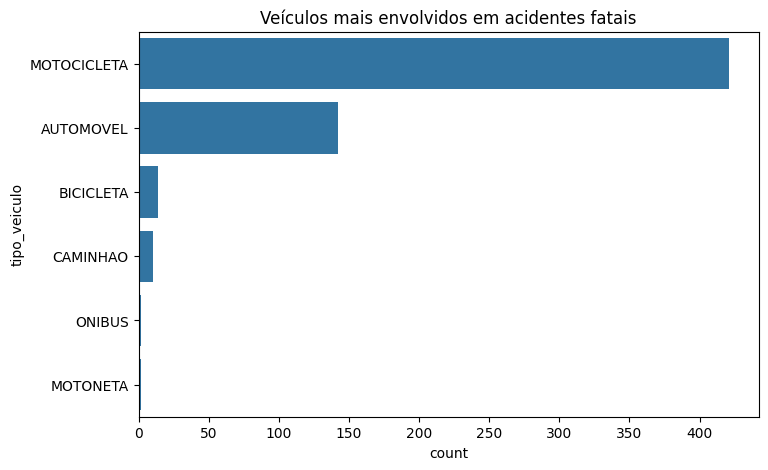

In [15]:
# Taxa de letalidade
letalidade = df_jp["qtde_acid_com_obitos"].sum() / df_jp["qtde_acidente"].sum()
print(f"Taxa de letalidade: {letalidade:.2%}")

# Distribuição por faixa etária (sem NAO INFORMADO)
df_faixa = limpar_categoria(df_jp, "faixa_idade")
plt.figure(figsize=(12,5))
sns.countplot(
    data=df_faixa,
    y="faixa_idade",
    order=df_faixa["faixa_idade"].value_counts().index
)
plt.title("Distribuição de vítimas por faixa etária")
plt.show()

# Tipo de veículo em acidentes fatais (sem NAO INFORMADO)
fatal = df_jp[df_jp["qtde_acid_com_obitos"] > 0]
fatal = limpar_categoria(fatal, "tipo_veiculo")
plt.figure(figsize=(8,5))
sns.countplot(data=fatal, y="tipo_veiculo", order=fatal["tipo_veiculo"].value_counts().index)
plt.title("Veículos mais envolvidos em acidentes fatais")
plt.show()

## 6) Condições da via e clima

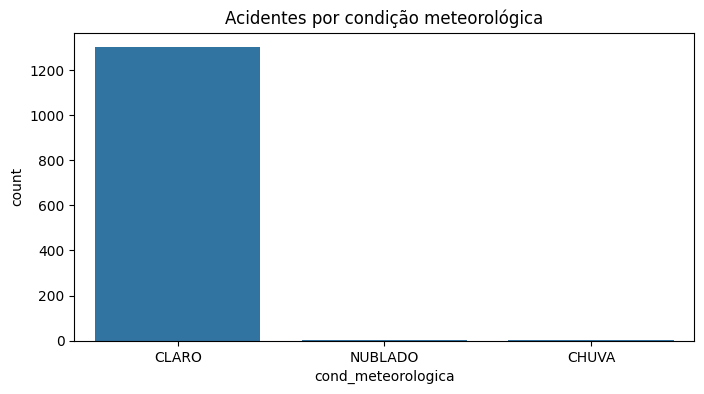

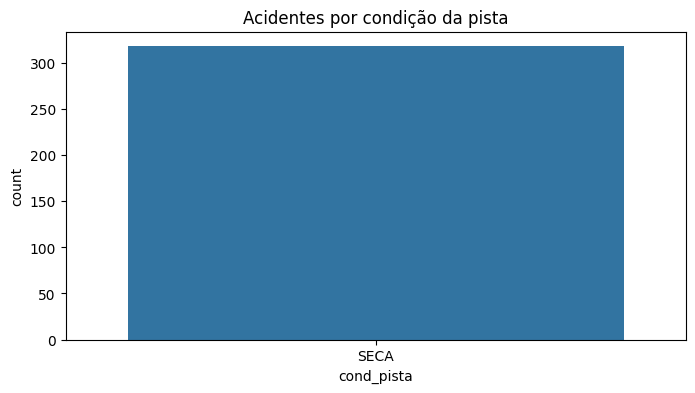

In [16]:
# Condição meteorológica
plt.figure(figsize=(8,4))
df_clima = limpar_categoria(df_jp, "cond_meteorologica")
sns.countplot(data=df_clima, x="cond_meteorologica", order=df_clima["cond_meteorologica"].value_counts().index)
plt.title("Acidentes por condição meteorológica")
plt.show()

# Condição da pista
plt.figure(figsize=(8,4))
df_pista = limpar_categoria(df_jp, "cond_pista")
sns.countplot(data=df_pista, x="cond_pista", order=df_pista["cond_pista"].value_counts().index)
plt.title("Acidentes por condição da pista")
plt.show()

## 7) Indicadores de risco

In [18]:
# Bairro mais crítico
bairro_critico = df_bairro["bairro_acidente"].mode()[0]
print("Bairro com mais acidentes:", bairro_critico)

# Rua mais crítica
rua_critica = df_rua["end_acidente"].mode()[0]
print("Rua com mais acidentes:", rua_critica)

Bairro com mais acidentes: MANGABEIRA
Rua com mais acidentes: AV HILTON SOUTO MAIOR
